# Pattern Formation Visualization

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.ndimage import convolve


## Turing Model

$$\frac{\partial u}{\partial t} = F(u,v)-d_uu+D_u\Delta u$$
$$\frac{\partial v}{\partial t} = G(u,v)-d_vv+D_v\Delta v$$

$$F(u,v)=a_uu+b_uv+c_u$$
$$G(u,v)=a_vu+b_vv+c_v$$

To explore the mathematical essence, we first set the system to be one-dimensional in space and simplify the equations as:
$$\frac{\partial u}{\partial t} = F(u,v)+D_u\Delta u$$
$$\frac{\partial v}{\partial t} = G(u,v)+D_v\Delta v$$
$$F(u,v)=a_uu+b_uv$$
$$G(u,v)=a_vu+b_vv$$


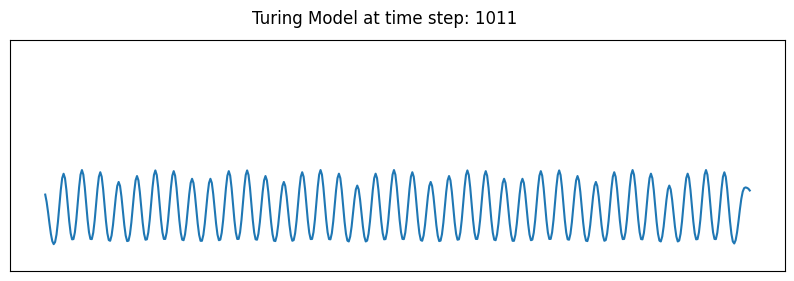

In [33]:
# Parameters for visualization
length = 500  # Set a 500-element vector
dt = 0.5  # Time step
T = 1020  # Total time
print_interval = 10  # Number of time steps between two prints

# Model parameters
a_u = 0.1
b_u = -0.1
D_u = 0.01
F_max = 0.5

a_v = 0.4
b_v = -0.3
D_v = 0.5
G_max = 0.5

# Initialize u and v
u = np.zeros(length)
v = np.zeros(length)
u[::13] = 1
v[::17] = 1

# Calculate the laplacian
def laplacian(arr):
    return (
        np.roll(arr, 1) + np.roll(arr, -1) - 2 * arr
    )

# Define F and G
def F_func(u, v):
    return a_u * u + b_u * v 

def G_func(u, v):
    return a_v * u + b_v * v 

# Prepare the figure
fig, axs = plt.subplots(1, 1, figsize=(10,3))
line_u, = axs.plot(u, animated=True)
# line_v, = axs.plot(v, animated=True)

# Hide axis
axs.set_xticks([])
axs.set_yticks([])

def init():
    line_u.set_ydata(np.ma.array(u, mask=True))
    # line_v.set_ydata(np.ma.array(v, mask=True))
    # return [line_u, line_v]
    return [line_u]

def update(frame):
    global u, v
    
    for _ in range(print_interval):
        F_val = F_func(u, v)
        G_val = G_func(u, v)
        F_val = np.clip(F_val, 0, F_max)
        G_val = np.clip(G_val, 0, G_max)
        
        u += dt * (F_val + D_u * laplacian(u))
        v += dt * (G_val + D_v * laplacian(v))
    
    line_u.set_ydata(u)
    # line_v.set_ydata(v)
    fig.suptitle(f"Turing Model at time step: {frame * print_interval + 1}")
    # return [line_u, line_v]
    return [line_u]

ani = FuncAnimation(fig, update, frames=range(T // print_interval), init_func=init, blit=True)

# Save the gif
ani.save("./gif&fig/1 Turing Model/D Turing Model.gif", writer=PillowWriter(fps=100))

plt.show()

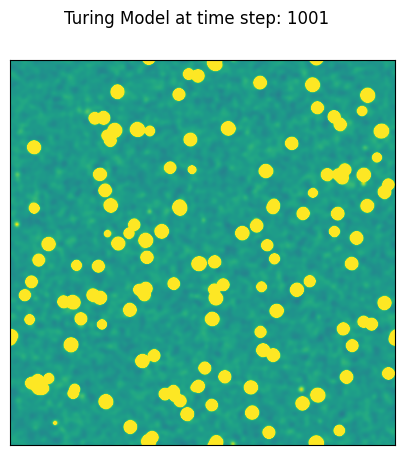

In [22]:
# 2D visualization
# Parameters for visualization
length = 500  # Set a 500x500 matrix
dt = 0.5  # Time step
T = 1020  # Total time
print_interval = 20  # Number of time steps between two prints

# Model parameters
a_u = 0.1
b_u = -0.1
c_u = 0.
d_u = 0.
D_u = 0.01
F_max = 0.5


a_v = 0.4
b_v = -0.3
c_v = 0.
d_v = 0.
D_v = 0.5
G_max = 0.5

# Initialize u and v
u = np.random.rand(length, length)
v = np.random.rand(length, length)


# Calculate the laplacian
def laplacian(arr):
    return (
        np.roll(arr, 1, axis=0) + np.roll(arr, -1, axis=0) +
        np.roll(arr, 1, axis=1) + np.roll(arr, -1, axis=1) - 
        4 * arr
    )

# Define F and G
def F_func(u, v):
    return a_u * u + b_u * v + c_u

def G_func(u, v):
    return a_v * u + b_v * v + c_v

# Prepare the figure
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
im_u = axs.imshow(u, cmap='viridis', animated=True)
# im_v = axs[1].imshow(v, cmap='viridis', animated=True)

# Hide axis
# for ax in axs:
axs.set_xticks([])
axs.set_yticks([])

def init():
    im_u.set_array(np.ma.array(u, mask=True))
    # im_v.set_array(np.ma.array(v, mask=True))
    return [im_u]

def update(frame):
    global u, v
    
    for _ in range(print_interval):
        F_val = F_func(u, v)
        G_val = G_func(u, v)
        F_val = np.clip(F_val, 0, F_max)
        G_val = np.clip(G_val, 0, G_max)
        
        u += dt * (F_val - d_u * u + D_u * laplacian(u))
        v += dt * (G_val - d_v * v + D_v * laplacian(v))
    
    im_u.set_array(u)
    # im_v.set_array(v)
    fig.suptitle(f"Turing Model at time step: {frame * print_interval + 1}")
    return [im_u]

ani = FuncAnimation(fig, update, frames=range(T // print_interval), init_func=init, blit=True)

# Save the gif
ani.save("./gif&fig/1 Turing Model/2D Turing Model.gif", writer=PillowWriter(fps=100))

plt.show()


## Belousov-Zhabotinshky Reaction Model

A simple reaction model involving three chemical substrates:
$$A+B \rightarrow 2A \quad\alpha$$
$$B+C \rightarrow 2B \quad\beta$$
$$C+A \rightarrow 2C \quad\gamma$$

where  are rate constants. The concentrations of and maybe followed on a grid of discrete time points through the equations
$$[A]_{t+1}=[A]_t+[A]_t(\alpha[B]_t-\gamma[C]_t)$$
$$[B]_{t+1}=[B]_t+[B]_t(\beta[C]_t-\alpha[A]_t)$$
$$[C]_{t+1}=[C]_t+[C]_t(\gamma[A]_t-\beta[B]_t)$$

The code reproduction is as follows :

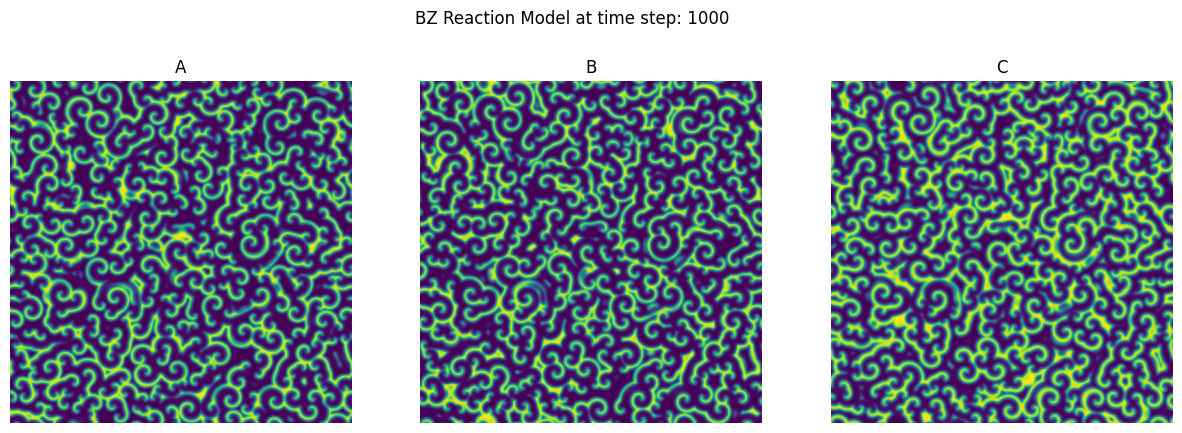

In [34]:
# Parameters for visualization
length = 500  # Set a 500x500 matrix
dt = 0.5  # Time step
T = 1000  # Total time
print_interval = 1  # Number of time steps between two prints

# Model parameters
alpha = 1.2
beta = 1.
gamma = 1.

# Initialize A and B and C
A = np.random.rand(length, length)
B = np.random.rand(length, length)
C = np.random.rand(length, length)

# Calculate the laplacian
def laplacian(arr):
    return (
        np.roll(arr, 1, axis=0) + np.roll(arr, -1, axis=0) +
        np.roll(arr, 1, axis=1) + np.roll(arr, -1, axis=1) - 
        4 * arr
    )

# diffusion filter (to simulate diffusion)
F = np.ones((3, 3)) / 8
F[1, 1] = 0

# Prepare the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

def update(k_t):
    global A, B, C
    
    # Simulate diffusion
    A = convolve(A, F, mode='wrap')
    B = convolve(B, F, mode='wrap')
    C = convolve(C, F, mode='wrap')
    
    # Update concentrations
    A_new = A + A * (alpha * B - gamma * C) * dt
    B_new = B + B * (beta * C - alpha * A) * dt
    C_new = C + C * (gamma * A - beta * B) * dt

    A = A_new
    B = B_new
    C = C_new
    
    # Update plots
    axs[0].clear()
    im0 = axs[0].imshow(A, cmap='viridis')
    axs[0].set_title('A')
    axs[0].axis('off')

    axs[1].clear()
    im1 = axs[1].imshow(B, cmap='viridis')
    axs[1].set_title('B')
    axs[1].axis('off')

    axs[2].clear()
    im2 = axs[2].imshow(C, cmap='viridis')
    axs[2].set_title('C')
    axs[2].axis('off')

    fig.suptitle(f'BZ Reaction Model at time step: {k_t * print_interval + 1}')

# Create the animation
anim = FuncAnimation(fig, update, frames=range(T // print_interval), repeat=False)

# Save the animation as a GIF
anim.save('./gif&fig/2 BZ Reaction Model/BZ Reaction Model.gif', writer=PillowWriter(fps=60))

plt.show()

## Gray-Scott Model
$$\frac{\partial u}{\partial t} = D_u \Delta u - uv^2 + f(1 - u)$$
$$\frac{\partial v}{\partial t} = D_v \Delta v + uv^2 - (f + k)v$$
+ $u$ and $v$ are the concentrations of two chemical substances, respectively.
+ $D_u$ and $D_v$ are the diffusion coefficients of the two chemical substances, respectively.
+ $f$ is the feed rate, representing the rate at which substance U is introduced into the system.
+ $k$ is the kill rate, representing the rate at which substance V is removed from the system.
+ $\Delta$  is the Laplacian operator, describing the diffusion process.

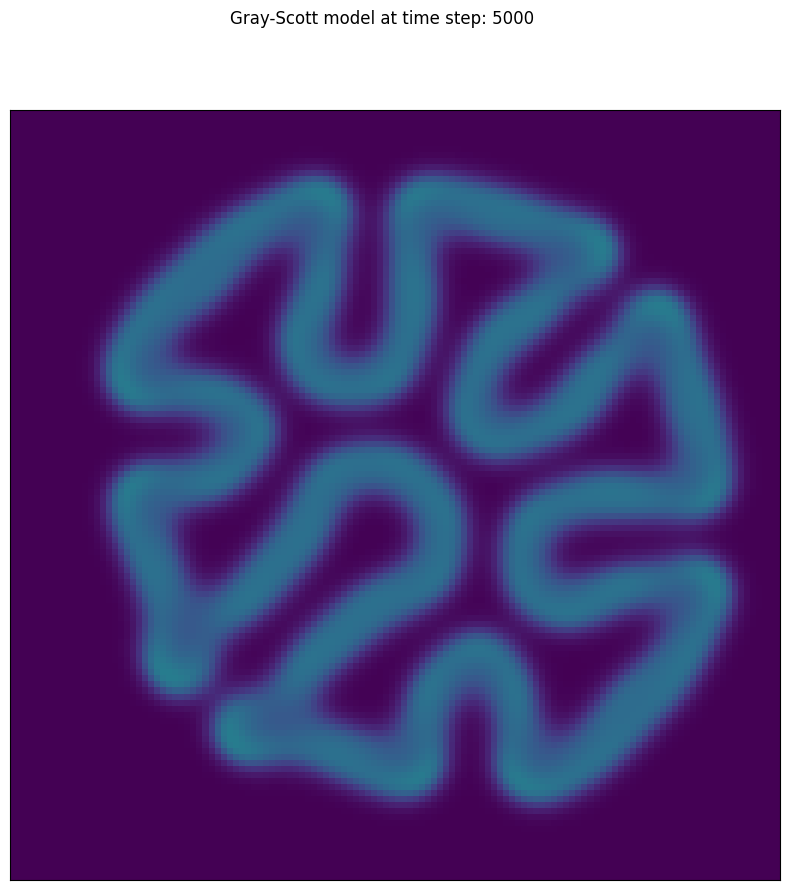

In [29]:
# Parameters for visualization
length = 128  # Set a 128x128 matrix
dt = 0.5  # Time step
T = 5100  # Total time
print_interval = 100  # Number of time steps between two prints

# Model parameters
f = 0.055
k = 0.062
D_u = 1
D_v = 0.5

# Initialize u and v
u = np.ones((length, length))
v = np.zeros((length, length))
v[51:60, 51:70] = 1
v[61:80, 71:80] = 1
# u = np.random.rand(length, length)
# v = np.random.rand(length, length)


def my_laplacian(in_arr):
    out = -in_arr \
        + 0.20 * (np.roll(in_arr, 1, axis=0) + np.roll(in_arr, -1, axis=0) \
        + np.roll(in_arr, 1, axis=1) + np.roll(in_arr, -1, axis=1)) \
        + 0.05 * (np.roll(in_arr, [1, 1], axis=(0, 1)) + np.roll(in_arr, [-1, 1], axis=(0, 1)) \
        + np.roll(in_arr, [-1, -1], axis=(0, 1)) + np.roll(in_arr, [1, -1], axis=(0, 1)))
    return out

# Calculate the laplacian
def laplacian(arr):
    return (
        np.roll(arr, 1, axis=0) + np.roll(arr, -1, axis=0) +
        np.roll(arr, 1, axis=1) + np.roll(arr, -1, axis=1) - 
        4 * arr
    )

# Prepare the figure
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
# im_u = axs[0].imshow(u, cmap='viridis', animated=True)
im_v = axs.imshow(v, cmap='viridis', animated=True)

# Hide axis
# for ax in axs:
axs.set_xticks([])
axs.set_yticks([])

def init():
    im_u.set_array(np.ma.array(u, mask=True))
    im_v.set_array(np.ma.array(v, mask=True))
    return [im_v]

def update(frame):
    global u, v
    
    for _ in range(print_interval):
        old_u = u.copy()
        old_v = v.copy()
        u += dt * (D_u * my_laplacian(old_u) - old_u * old_v * old_v + f * (1 - old_u))
        v += dt * (D_v * my_laplacian(old_v) + old_u * old_v * old_v - (f + k) * old_v)
    
    im_u.set_array(u)
    im_v.set_array(v)
    fig.suptitle(f"Gray-Scott model at time step: {frame * print_interval}")
    return [im_v]

ani = FuncAnimation(fig, update, frames=range(T // print_interval), init_func=init, blit=True)

# Save the gif
ani.save("./gif&fig/3 Gray-Scott Model/Gray-Scott Model.gif", writer=PillowWriter(fps=100))

plt.show()


## Lengyel-Epstein Model

$$\frac {\partial u}{\partial t}=D_u\Delta u+k_1(v-\frac{uv}{1+v^2})$$
$$\frac {\partial v}{\partial t}=D_v\Delta v+k_2-v-\frac{4uv}{1+v^2}$$

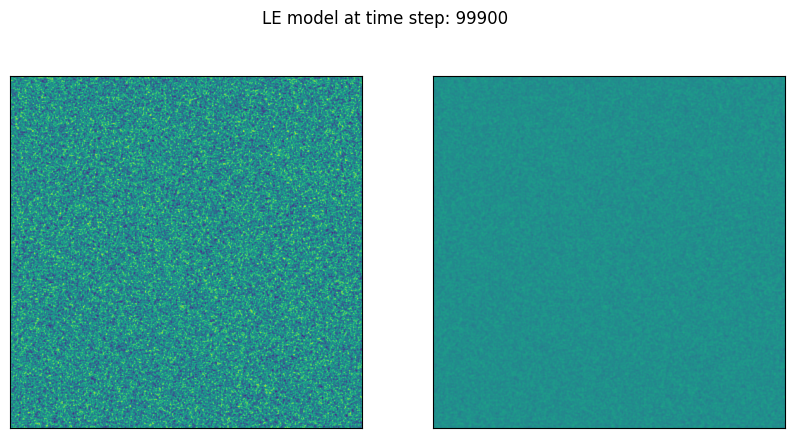

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters for visualization
length = 500  # Set a 500x500 matrix
dt = 0.00001  # Time step
T = 10000  # Total time
print_interval = 100  # Number of time steps between two prints

# Model parameters
Du=1
Dv=0.01
k1=11
k2=11

# Steady-state values
ubar = 1 + 0.04 * k2**2
vbar = 0.2 * k2

# Initialize u and v with small random perturbations around ubar and vbar
np.random.seed(42)  # Ensure reproducibility
u = ubar + 0.1 * (2 * np.random.rand(length, length) - 1)
v = vbar + 0.1 * (2 * np.random.rand(length, length) - 1)

# Calculate the laplacian
def laplacian(arr):
    return (
        np.roll(arr, 1, axis=0) + np.roll(arr, -1, axis=0) +
        np.roll(arr, 1, axis=1) + np.roll(arr, -1, axis=1) - 
        4 * arr
    )

# Prepare the figure
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im_u = axs[0].imshow(u, cmap='viridis', animated=True)
im_v = axs[1].imshow(v, cmap='viridis', animated=True)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

def init():
    im_u.set_array(np.ma.array(u, mask=True))
    im_v.set_array(np.ma.array(v, mask=True))
    return [im_u, im_v]

def update(frame):
    global u, v
    
    for _ in range(print_interval):
        old_u = u.copy()
        old_v = v.copy()
        u += dt * (D_u * laplacian(old_u) + k1 * (v - (u * v) / (1 + v * v)))
        v += dt * (D_v * laplacian(old_v) + k2 - v - (4 * u * v / (1 + v * v)))
    
    im_u.set_array(u)
    im_v.set_array(v)
    fig.suptitle(f"LE model at time step: {frame * print_interval}")
    return [im_u, im_v]

ani = FuncAnimation(fig, update, frames=range(T // print_interval), init_func=init, blit=True)
ani.save("./gif&fig/LE Model.gif", writer=PillowWriter(fps=100))

plt.show()
